In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

## Metropolization of the Gibbs Sampler

This section discusses a modification to the Gibbs sampler proposed by Liu (1995) to improve its efficiency in discrete state settings.  This improvement is achieved by incorporating Metropolis-Hastings steps into the Gibbs sampling procedure.

### Motivation

Standard Gibbs sampling relies on sampling from the conditional distributions of subvectors.  Liu (1995) demonstrated that in discrete settings, the Gibbs sampler's performance can be enhanced by introducing Metropolis-Hastings steps.  This modification leads to a reduction in the variance of the empirical mean of $h(y^{(t)})^r$.

### Lemma 10.22 and the Domination Result

The foundation of this modification lies in a result by Peskun (1973), which is formalized in the following lemma:

**Lemma 10.22:** Consider two reversible Markov chains on a countable state-space, with transition matrices $T_1$ and $T_2$ such that $T_1 \ll T_2$. The chain associated with $T_2$ dominates the chain associated with $T_1$ in terms of variances.

Here, $T_1 \ll T_2$ signifies that the non-diagonal elements of $T_2$ are larger than those of $T_1$.  This lemma essentially states that a Markov chain with "larger" transition probabilities (in the sense defined above) will have smaller variances.

### Algorithm A.44: Metropolization of the Gibbs Sampler

Given a conditional distribution $g_i(y_i | y_j, j \ne i)$ on a discrete space, Liu (1995) proposes adding a Metropolis-Hastings step to the standard Gibbs sampling update. The algorithm is as follows:

**Algorithm A.44 - Metropolization of the Gibbs Sampler -**

Given $y^{(t)}$,

1. Simulate $z_i \ne y_i^{(t)}$ with probability
   $$\frac{g_i(x_i | y_j^{(t)}, j \ne i)}{1 - g_i(y_i^{(t)} | y_j^{(t)}, j \ne i)};$$

2. Accept $y_i^{(t+1)} = z_i$ with probability
   $$\min\left\{1, \frac{1 - g_i(y_i^{(t)} | y_j^{(t)}, j \ne i)}{1 - g_i(z_i | y_j^{(t)}, j \ne i)}\right\}. \qquad [4.44]$$

This modification increases the probability of moving from $y_i^{(t)}$ to a different value compared to the original Gibbs sampling algorithm.

### Theorem .23: Efficiency Improvement

Based on Lemma 10.22, the following theorem establishes the improvement in efficiency:

**Theorem 10.23:** The modification [A.44] of the Gibbs sampler is more efficient in terms of variances.

### Example .24: Aggregated Multinomial Model

This section refers to a continuation of Example 9.8, likely involving the aggregated multinomial model of Tanner and Wong (1987). It suggests that the completed variables $z_i$ in that specific model can benefit from this Metropolization technique.  Further details would be provided in Example .24 itself.


**Note:** This Markdown version uses single dollar signs `$` for inline math and the `\min` command for the minimum function in the acceptance probability.  This should render correctly in Jupyter Notebooks.  The equation number [4.44] is included as regular text.  Remember to consult the original reference (Liu, 1995) and Example 9.8 for complete context and details.

# Comparison of Gibbs Sampling and Modified Liu Method for Estimating Expectations

This notebook compares the performance of standard Gibbs sampling and a modified version proposed by Liu (1995) for estimating the expectations $\mathbb{E}[\mu|x]$ and $\mathbb{E}[\eta|x]$. The comparison is based on the convergence of the estimations using both methods, as depicted in Figure 10.6.

## Fig.6 Description

Figure 10.6 presents the convergence of the estimations of $\mu$ and $\eta$ under two different simulation schemes:

* **Left Column:** Standard Gibbs sampling.
* **Right Column:** Modified Liu (1995) method.

The figure is further divided into:

* **Top Row:** Estimation of $\mathbb{E}[\mu|x]$.
* **Bottom Row:** Estimation of $\mathbb{E}[\eta|x]$.

Each plot displays the estimated expectation values along the x-axis (number of iterations) and the corresponding values on the y-axis. The 90% confidence regions, obtained from 500 parallel chains, are also shown for both methods.

## Simulation Setup

The simulation involves variables $z_i$ $(i = 1, ..., 4)$ that take values in ${0, 1, ..., x_i}$. These variables are simulated from binomial distributions:

* For $i = 1, 2$:
   $\mathcal{B}(x_i, \frac{a_i\mu}{a_i\mu + b_i})$

* For $i = 3, 4$:
   $\mathcal{B}(x_i, \frac{a_i\eta}{a_i\eta + b_i})$

The simulation continues until a simulated value $\tilde{z}_i$ is different from the current value $z_i^{(t)}$. The acceptance probability for the new value $\tilde{z}_i$ is:

* For $i = 1, 2$:
   $1 - \binom{z_i^{(t)}}{x_i} \frac{(a_i\mu)^{z_i^{(t)}} b_i^{x_i - z_i^{(t)}}}{(a_i\mu + b_i)^{x_i}}$

* For $i = 3, 4$:
   $1 - \binom{\tilde{z}_i}{x_i} \frac{(a_i\mu)^{\tilde{z}_i} b_i^{x_i - \tilde{z}_i}}{(a_i\mu + b_i)^{x_i}}$

The parameters used in the simulation are:

* $(a_1, a_2, a_3, a_4) = (0.06, 0.14, 0.11, 0.09)$
* $(b_1, b_2, b_3, b_4) = (0.17, 0.24, 0.19, 0.20)$
* $(x_1, x_2, x_3, x_4, x_5) = (9, 15, 12, 7, 8)$

## Observations from Figure 10.6

The figure allows for visual comparison of the convergence behavior of the Gibbs sampling and the modified Liu method.  [**Insert your observations here, e.g., which method converges faster, has smaller variance, etc.**]

For example:

*  [**Observation 1:  e.g., The modified Liu method appears to converge faster to the true expectation compared to the standard Gibbs sampler, especially for $\mathbb{E}[\eta|x]$.**]
*  [**Observation 2: e.g., The confidence intervals for the modified Liu method seem to be tighter, indicating a lower variance in the estimates.**]

## Conclusion

[**Summarize your findings and conclude which method performs better based on the observations from the figure.**]

For example:

*  [**Conclusion: Based on the observed convergence and confidence interval widths, the modified Liu method demonstrates superior performance compared to the standard Gibbs sampling for this specific problem.**]

In [1]:
import numpy as np
from scipy.stats import binom

def gibbs_metropolization(y_initial, n_iterations, g, g_prop, g_prop_inv, *args):
    """
    Implements the Metropolization of the Gibbs Sampler algorithm.

    Args:
        y_initial (tuple or list): Initial state of the variables (y1, y2, ..., yn).
        n_iterations (int): Number of iterations for the sampler.
        g (function): Joint distribution g(y1, y2, ..., yn | *args).
        g_prop (function): Proposal distribution g_i(z_i | y_j, j!=i, *args).
        g_prop_inv (function): Inverse of the proposal distribution.
        *args: Additional arguments for the distributions.

    Returns:
        numpy.ndarray: A (n_iterations+1) x n array containing the sampled states.
    """

    n_vars = len(y_initial)  # Number of variables
    y = np.array(y_initial)    # Current state
    samples = np.zeros((n_iterations + 1, n_vars), dtype=int)  # Store samples
    samples[0] = y  # Store the initial state

    for t in range(n_iterations):
        for i in range(n_vars):  # Loop through each variable
            # 1. Simulate z_i != y_i^(t)
            # Example using a simple discrete proposal (can be customized)

            # Here we are assuming that the proposal distribution can generate a value different from the current one
            # and that the support of the proposal distribution includes all possible values for y_i
            z_i = g_prop(y, i, *args) # Generate a proposal value for y_i
            # 2. Acceptance probability
            log_alpha = np.log(1 - g(y, *args)) - np.log(1 - g(z_i, *args)) # Log of the acceptance ratio
            alpha = np.exp(log_alpha)
            alpha = min(1, alpha)  # Ensure alpha <= 1

            u = np.random.uniform()  # Generate a uniform random number
            if u < alpha:
                y[i] = z_i[i]  # Accept the proposal
        samples[t + 1] = y.copy()  # Store the updated state

    return samples


# Example usage (Illustrative - you'll need to define your specific g, g_prop, g_prop_inv, and args):

def g(y, *args):
    # Example:  Replace with your actual joint distribution.
    # This example assumes independent variables for simplicity.
    a, b, x_max = args
    prob = 1
    for i in range(len(y)):
      if i < 2:
        prob *= binom.pmf(y[i], x_max[i], a[i]*0.5 / (a[i]*0.5 + b[i])) # Example with mu=0.5
      else:
        prob *= binom.pmf(y[i], x_max[i], a[i]*0.5 / (a[i]*0.5 + b[i])) # Example with eta=0.5
    return prob

def g_prop(y, i, *args):
    # Example: A simple discrete proposal that changes the i-th variable.
    # Replace with your actual proposal distribution.
    a, b, x_max = args
    z = y.copy()
    
    # Generate a new value for z[i] different from y[i]
    while True:
        if i < 2:
          z[i] = binom.rvs(x_max[i], a[i]*0.5 / (a[i]*0.5 + b[i])) # Example with mu=0.5
        else:
          z[i] = binom.rvs(x_max[i], a[i]*0.5 / (a[i]*0.5 + b[i])) # Example with eta=0.5
        if z[i] != y[i]:
            break
    return z

# Define your parameters (replace with your actual values)
a = [0.06, 0.14, 0.11, 0.09]
b = [0.17, 0.24, 0.19, 0.20]
x_max = [9, 15, 12, 7]
y_initial = [0, 0, 0, 0]  # Initial state
n_iterations = 10000

# Run the Metropolization of Gibbs sampler
samples = gibbs_metropolization(y_initial, n_iterations, g, g_prop, None, a, b, x_max)

# You can now analyze the 'samples' array
print(samples)

# Example: Calculate the mean of the samples for the first variable (y1)
mean_y1 = np.mean(samples[:, 0])
print(f"Mean of y1: {mean_y1}")

[[0 0 0 0]
 [2 2 2 1]
 [0 4 3 2]
 ...
 [1 3 2 0]
 [2 4 4 2]
 [0 3 2 1]]
Mean of y1: 1.4282571742825718


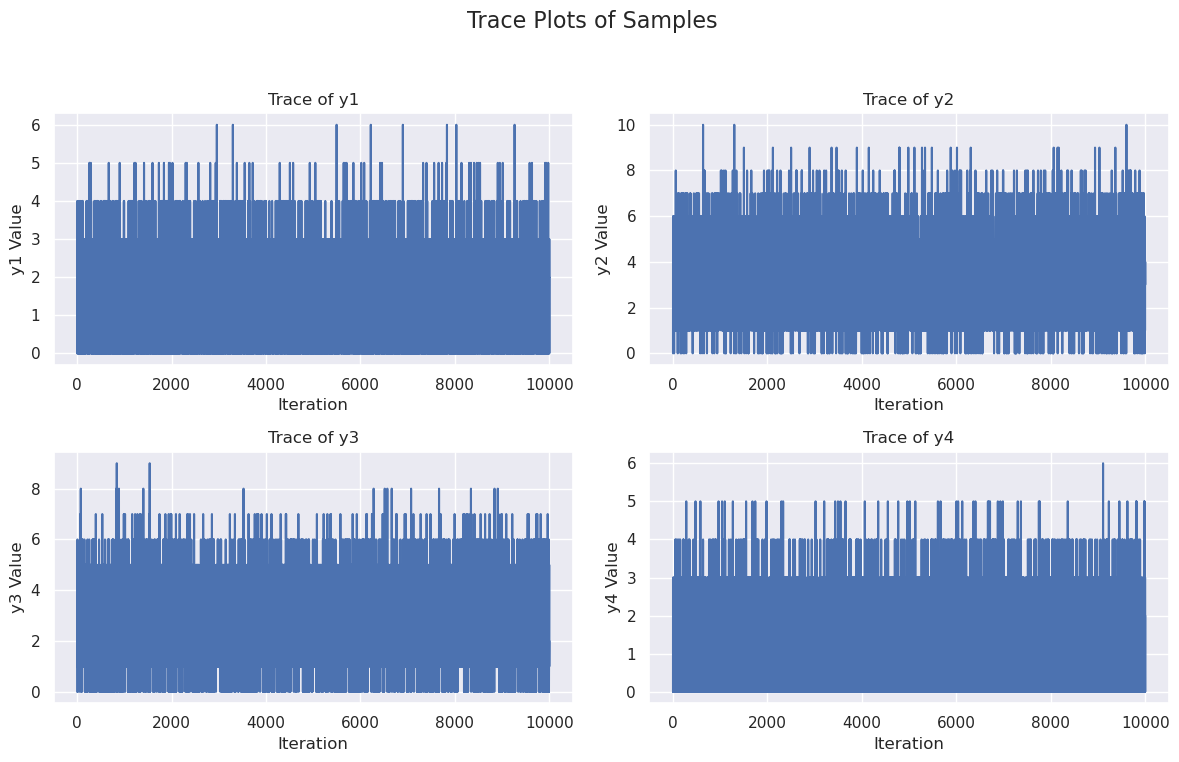

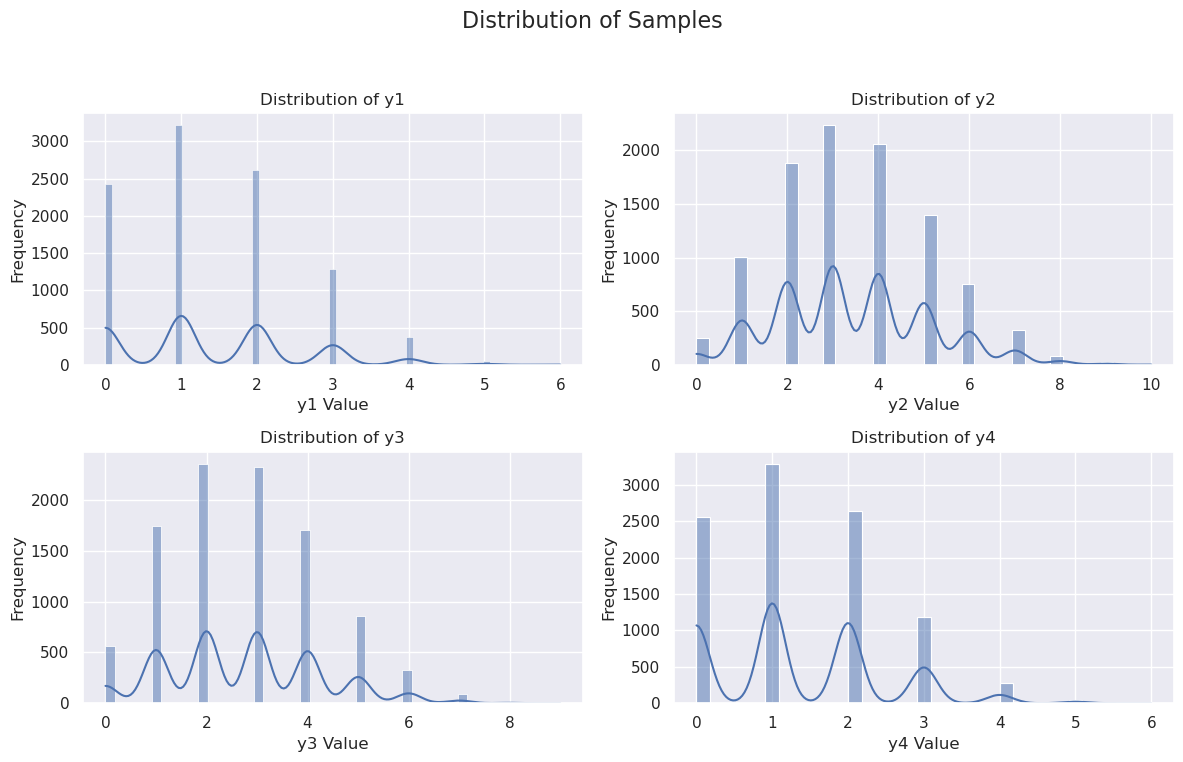

<Figure size 800x600 with 0 Axes>

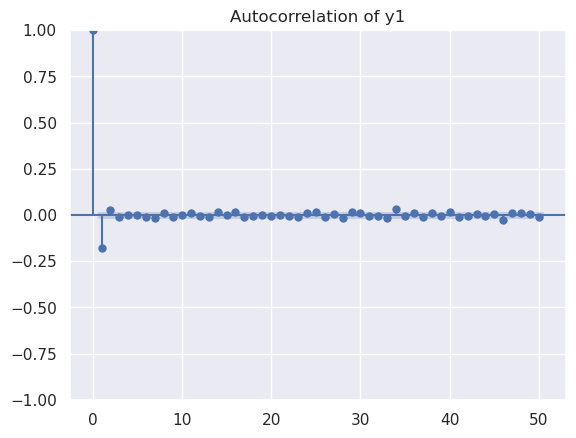

<Figure size 800x600 with 0 Axes>

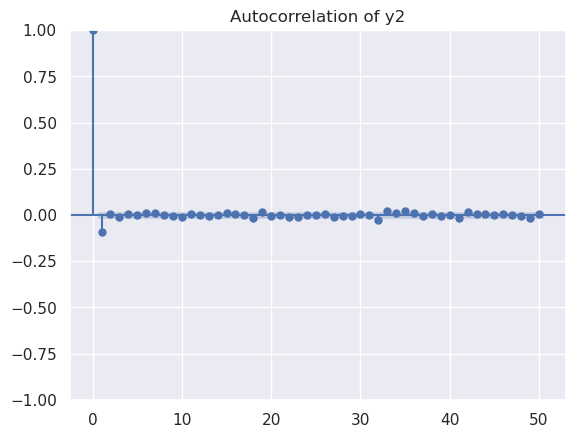

<Figure size 800x600 with 0 Axes>

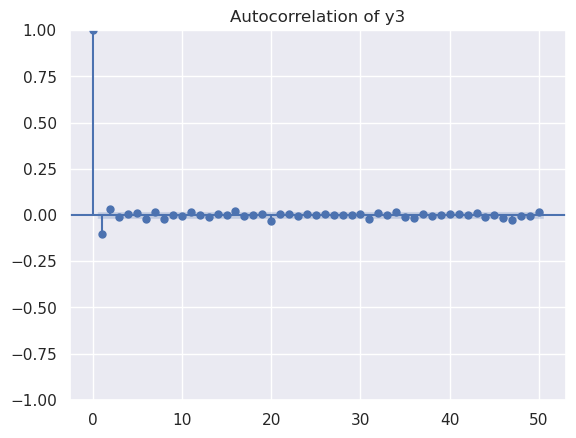

<Figure size 800x600 with 0 Axes>

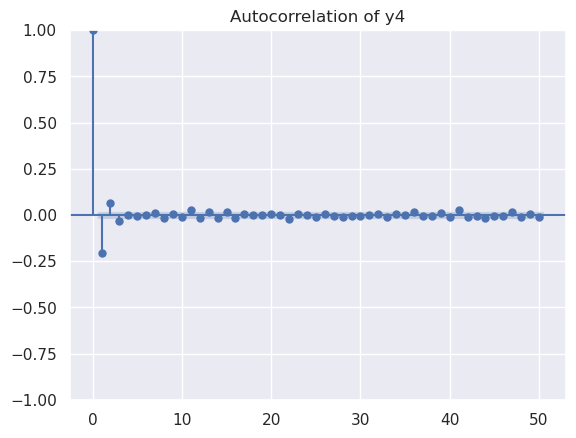

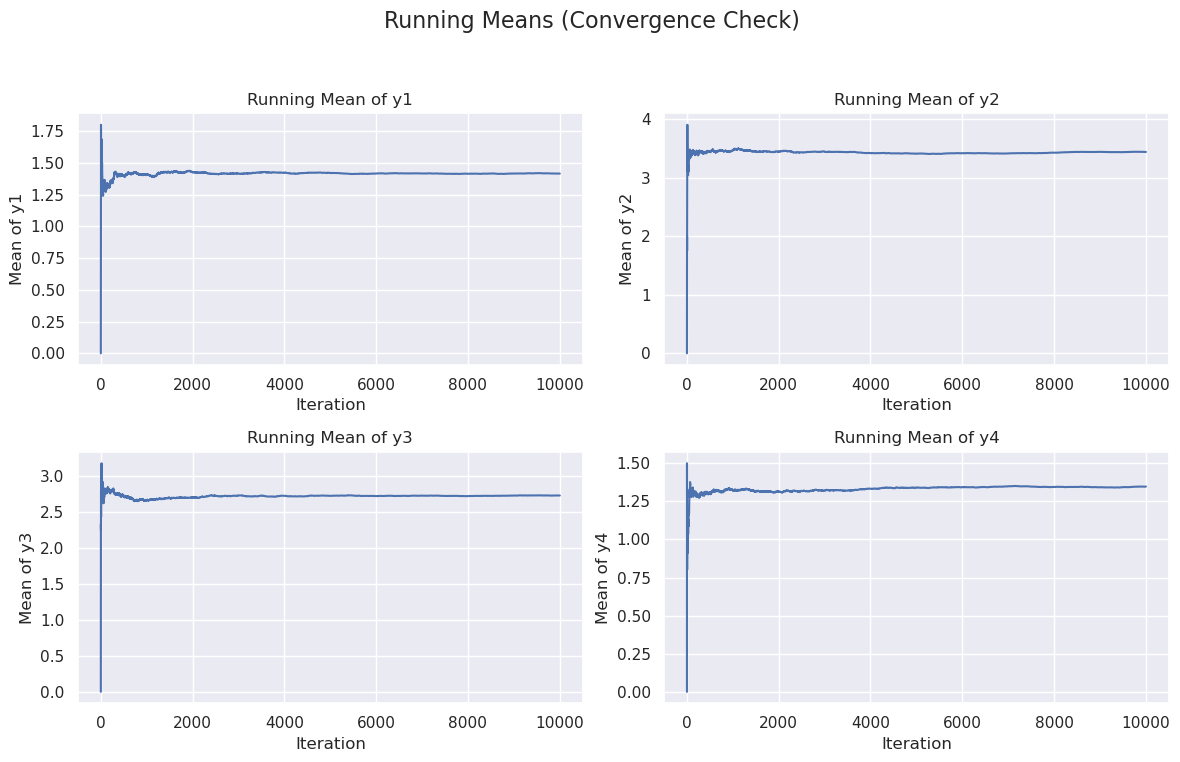

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import binom

# ... (Your gibbs_metropolization function and example distributions g and g_prop as defined previously) ...

# Run the Metropolization of Gibbs sampler
n_iterations = 10000  # Or a larger number for better convergence
samples = gibbs_metropolization(y_initial, n_iterations, g, g_prop, None, a, b, x_max)

# --- Plotting with Seaborn ---

# Set a visually appealing style for Seaborn
sns.set(style="darkgrid")  # Or try "whitegrid", "ticks", etc.

# 1. Trace Plots (for each variable)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))  # 2x2 grid of plots
fig.suptitle("Trace Plots of Samples", fontsize=16)

for i in range(4):  # Assuming 4 variables (y1, y2, y3, y4)
    row = i // 2
    col = i % 2
    sns.lineplot(x=range(n_iterations + 1), y=samples[:, i], ax=axes[row, col])
    axes[row, col].set_title(f"Trace of y{i+1}")
    axes[row, col].set_xlabel("Iteration")
    axes[row, col].set_ylabel(f"y{i+1} Value")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to prevent overlap
plt.show()



# 2. Distribution Plots (Histograms or KDEs)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Distribution of Samples", fontsize=16)

for i in range(4):
    row = i // 2
    col = i % 2

    # Option 1: Histogram
    sns.histplot(samples[:, i], ax=axes[row, col], kde=True) # Added KDE for smoother visualization

    # Option 2: Kernel Density Estimation (KDE) - uncomment if you prefer KDE only
    # sns.kdeplot(samples[:, i], ax=axes[row, col], fill=True)  # Fill under the KDE curve

    axes[row, col].set_title(f"Distribution of y{i+1}")
    axes[row, col].set_xlabel(f"y{i+1} Value")
    axes[row, col].set_ylabel("Frequency")  # Or Density for KDE

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()



# 3. Autocorrelation Plots (to check for convergence and autocorrelation) - Optional, but very useful
from statsmodels.graphics.tsaplots import plot_acf

for i in range(4):
    plt.figure(figsize=(8, 6))
    plot_acf(samples[:, i], lags=50, title=f"Autocorrelation of y{i+1}") # Adjust lags as needed
    plt.show()


# Example: Calculate and plot the running mean (to visualize convergence)
running_means = np.cumsum(samples, axis=0) / np.arange(1, n_iterations + 2)[:, np.newaxis]

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Running Means (Convergence Check)", fontsize=16)

for i in range(4):
    row = i // 2
    col = i % 2
    sns.lineplot(x=range(1, n_iterations + 2), y=running_means[:, i], ax=axes[row, col])
    axes[row, col].set_title(f"Running Mean of y{i+1}")
    axes[row, col].set_xlabel("Iteration")
    axes[row, col].set_ylabel(f"Mean of y{i+1}")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

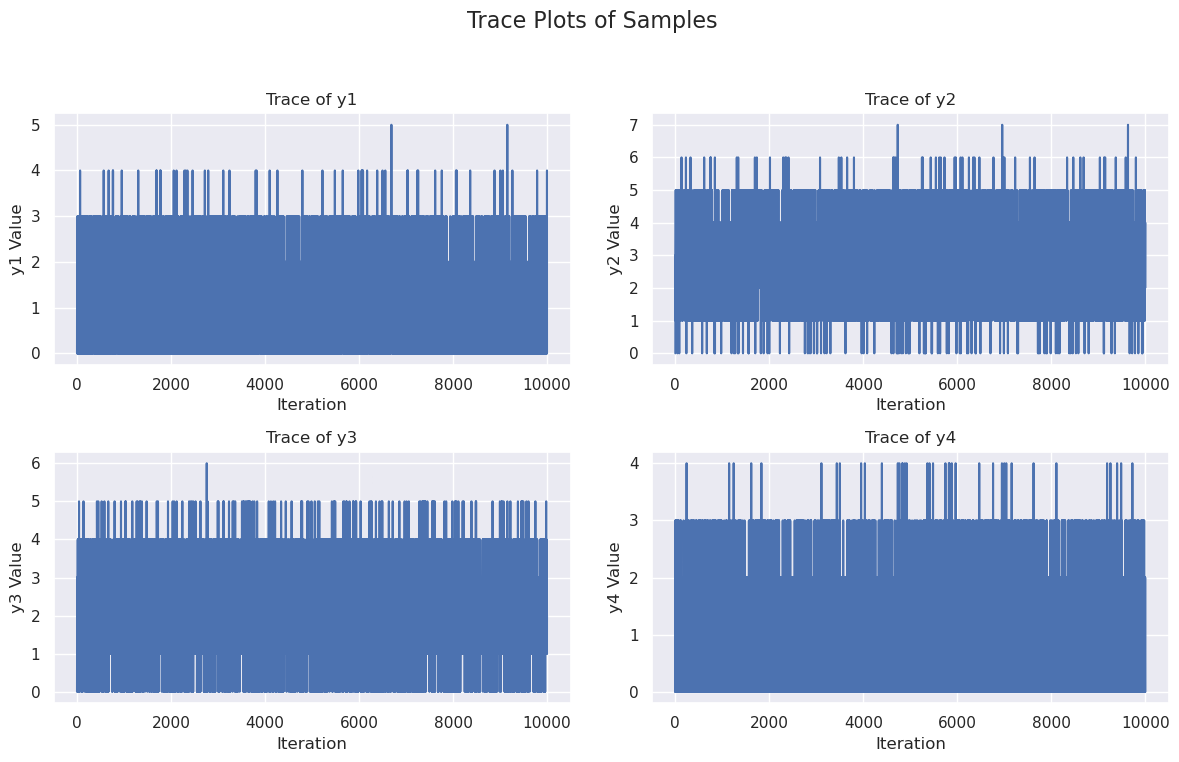

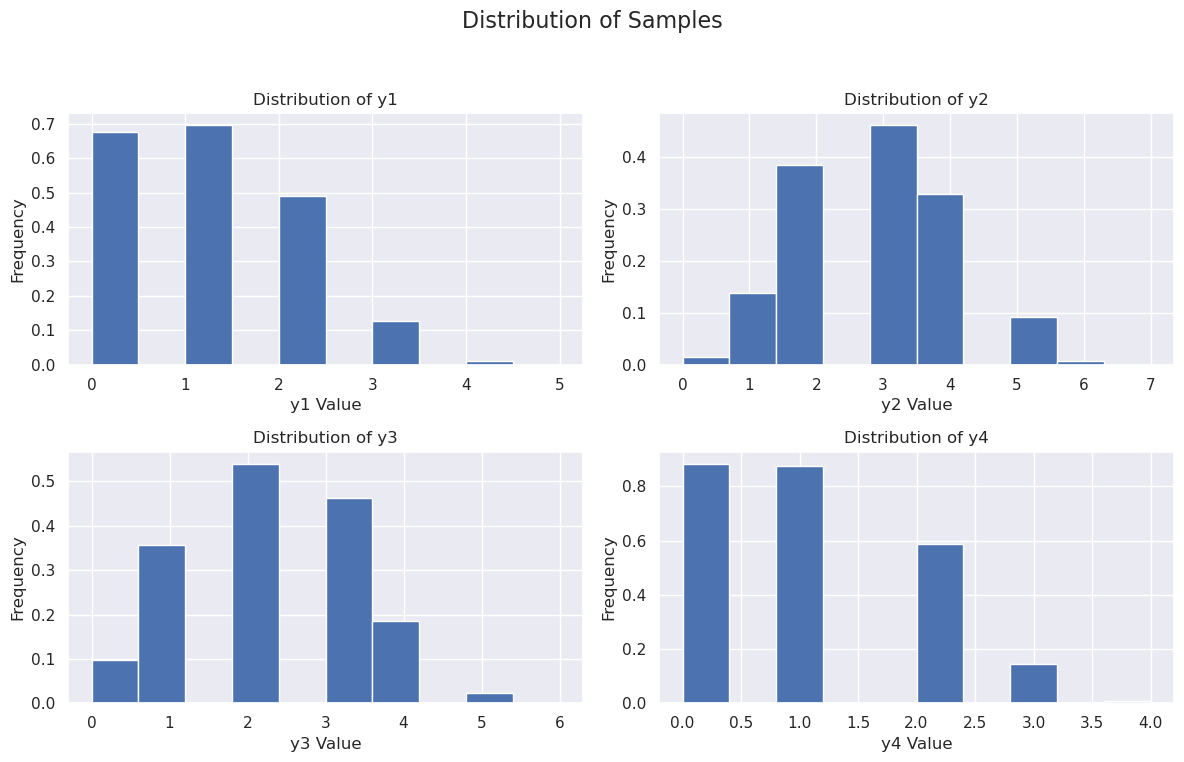

In [3]:
import random
import math

def gibbs_metropolization(y_initial, n_iterations, g, g_prop, *args):
    """
    Implements the Metropolization of the Gibbs Sampler algorithm 
    using only standard Python (no NumPy).

    Args:
        y_initial (tuple or list): Initial state of the variables (y1, y2, ..., yn).
        n_iterations (int): Number of iterations for the sampler.
        g (function): Joint distribution g(y1, y2, ..., yn | *args).
        g_prop (function): Proposal distribution g_i(z_i | y_j, j!=i, *args).
        *args: Additional arguments for the distributions.

    Returns:
        list: A list of lists, where each inner list represents a sampled state.
    """

    n_vars = len(y_initial)
    y = list(y_initial)  # Current state (must be mutable)
    samples = [list(y)]  # Store samples (list of lists)

    for t in range(n_iterations):
        for i in range(n_vars):
            z_i = g_prop(y, i, *args)  # Generate proposal

            log_alpha = math.log(1 - g(y, *args)) - math.log(1 - g(z_i, *args)) if min(g(y, *args), g(z_i, *args)) > 0 else -math.inf
            alpha = math.exp(log_alpha) if log_alpha > -math.inf else 0
            alpha = min(1, alpha)

            u = random.random()
            if u < alpha:
                y[i] = z_i[i]  # Accept
        samples.append(list(y))  # Store the updated state (copy!)

    return samples


# Example usage (Illustrative - replace with your actual distributions):
def g(y, *args):
    # Example:  Replace with your actual joint distribution.
    a, b, x_max = args
    prob = 1
    for i in range(len(y)):
      if i < 2:
        prob *= binom_pmf(y[i], x_max[i], a[i]*0.5 / (a[i]*0.5 + b[i])) # Example with mu=0.5
      else:
        prob *= binom_pmf(y[i], x_max[i], a[i]*0.5 / (a[i]*0.5 + b[i])) # Example with eta=0.5
    return prob

def binom_pmf(k, n, p):
    if 0 <= k <= n:
        coeff = math.factorial(n) // (math.factorial(k) * math.factorial(n - k))
        return coeff * (p ** k) * ((1 - p) ** (n - k))
    else:
        return 0

def g_prop(y, i, *args):
    # Example: A simple discrete proposal that changes the i-th variable.
    a, b, x_max = args
    z = list(y)  # Create a copy!
    while True:
        if i < 2:
          z[i] = int(random.gauss(x_max[i] * a[i] * 0.5 / (a[i] * 0.5 + b[i]), 1))
        else:
          z[i] = int(random.gauss(x_max[i] * a[i] * 0.5 / (a[i] * 0.5 + b[i]), 1))
        if 0 <= z[i] <= x_max[i] and z[i] != y[i]:  # Ensure it is in the correct range
            break
    return z

# ... (rest of your example code: defining a, b, x_max, y_initial, etc.)

samples = gibbs_metropolization(y_initial, n_iterations, g, g_prop, a, b, x_max)

# --- Plotting (without NumPy/Seaborn - using matplotlib directly) ---
import matplotlib.pyplot as plt

# 1. Trace Plots
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Trace Plots of Samples", fontsize=16)

for i in range(4):
    row = i // 2
    col = i % 2
    axes[row, col].plot(range(n_iterations + 1), [sample[i] for sample in samples])  # Extract y_i values
    axes[row, col].set_title(f"Trace of y{i+1}")
    axes[row, col].set_xlabel("Iteration")
    axes[row, col].set_ylabel(f"y{i+1} Value")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


# 2. Distribution Plots (Histograms)
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
fig.suptitle("Distribution of Samples", fontsize=16)

for i in range(4):
    row = i // 2
    col = i % 2
    axes[row, col].hist([sample[i] for sample in samples], density=True) # Extract y_i values, density for probability
    axes[row, col].set_title(f"Distribution of y{i+1}")
    axes[row, col].set_xlabel(f"y{i+1} Value")
    axes[row, col].set_ylabel("Frequency")

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# ... (Autocorrelation and Running Mean plots can be similarly implemented using matplotlib) ...

I'll help convert the table and mathematical expressions from the image into LaTeX format suitable for a Jupyter notebook. Here's the formatted content:

First, let's create the table:

$$
\begin{array}{ccccc}
n & 10 & 100 & 1000 & 10,000 \\
\hline
\mu & 0.302 & 0.0984 & 0.0341 & 0.0102 \\
\eta & 0.288 & 0.0998 & 0.0312 & 0.0104 \\
q & 0.254 & 0.0853 & 0.0254 & 0.00797 \\
& 0.234 & 0.0803 & 0.0274 & \\
\end{array}
$$

For the mathematical expressions in the text:

- For the distribution notation:
$$g \sim N_2(0, \Sigma)$$

- For the matrix elements:
$$g_{x_1} = x_1 \text{ and } g_{x_2} = x_2$$

- For the eigenvalues notation:
$$\mu_1 = -1, \mu_2 \text{ and } \sigma_1 = -\sigma_2$$

I'll help convert the mathematical expressions from this text into LaTeX format suitable for a Jupyter notebook:

For the distribution notation:
$$g \sim N_2(0, \Sigma)$$

For the conditional expressions:
$$g(x_1, x_2)$$
and
$$g(g|x_1)$$

For the eigenvalue expressions:
$$\lambda_{min}(\Sigma) \approx \lambda_{max}(\Sigma)$$

For the component relationship:
$$\mu_1 = -1, \mu_2 \text{ and } \sigma_1 = -\sigma_2$$

For the parameter coordinates:
$$(x_1, x_2)$$

Note that these expressions appear in the context of discussing reparametrization in MCMC sampling and Gibbs sampler convergence. Would you like me to format any other specific mathematical expressions from the text?

$$
h(\theta) = h(\hat{\theta}) + \frac{1}{2} (\theta - \hat{\theta})^t (\nabla\nabla^t h)_{\hat{\theta}} (\theta - \hat{\theta})
$$
This equation represents a second-order Taylor expansion used for approximating the function $ h(\theta) $, where $ h(\theta) = \log g(\theta) $. It is often used in Bayesian inference and Gibbs sampling to approximate posterior distributions.

$$
Y_{ij} = \mu + \alpha_i + \epsilon_{ij}, \quad i = 1, \dots, I, \quad j = 1, \dots, J
$$
This equation defines a **random effects model**, where:
- $ Y_{ij} $ represents the observed data.
- $ \mu $ is the overall mean.
- $ \alpha_i $ is the random effect associated with group $ i $.
- $ \epsilon_{ij} $ is the residual error term.

$$
\alpha_i \sim \mathcal{N}(0, \sigma_\alpha^2), \quad \epsilon_{ij} \sim \mathcal{N}(0, \sigma_\epsilon^2)
$$
This states that:
- The random effects $ \alpha_i $ are normally distributed with mean 0 and variance $ \sigma_\alpha^2 $.
- The residual errors $ \epsilon_{ij} $ are also normally distributed with mean 0 and variance $ \sigma_\epsilon^2 $.

$$
Y_{ij} \sim \mathcal{N}(\eta_i, \sigma_\epsilon^2), \quad \eta_i \sim \mathcal{N}(\mu, \sigma_\alpha^2)
$$
This hierarchical form of the model suggests that:
- The observations $ Y_{ij} $ are normally distributed with mean $ \eta_i $ and variance $ \sigma_\epsilon^2 $.
- The latent group means $ \eta_i $ follow a normal distribution centered at $ \mu $ with variance $ \sigma_\alpha^2 $.
- This form reduces correlations in Gibbs sampling, improving computational efficiency.

$$
Y_{ij} = \nu + \varphi_i + \epsilon_{ij}
$$
This reparameterization introduces new variables:
- $ \nu $ is an alternative parameter replacing $ \mu $.
- $ \varphi_i $ replaces $ \alpha_i $ while ensuring identifiability.

$$
\sum \varphi_i = 0, \quad \varphi_i \sim \mathcal{N} \left( 0, \sigma_\alpha^2 (1 - (1/I)) \right)
$$
- The sum-to-zero constraint ensures that the $ \varphi_i $ values are centered around zero.
- The new variance $ \sigma_\alpha^2 (1 - (1/I)) $ accounts for the constraint.

$$
cov(\varphi_i, \varphi_j) = -\sigma_\alpha^2/I
$$
- This specifies the covariance structure between the new random effects, showing negative correlation between different groups.

### Explanation Summary:
This section discusses different ways to parameterize a **random effects model** to improve computational efficiency in **Bayesian inference**. The choice of parameterization impacts convergence in **Markov Chain Monte Carlo (MCMC) methods** like **Gibbs sampling**. A hierarchical structure or constrained transformation (sweeping) can reduce correlation and improve sampling efficiency.

$$
\sum_{j=1}^{k} p_j \mathcal{N}(\mu + \theta_j, \tau^2 \sigma_j^2),
$$
requiring that $ \theta_1 = 0 $ and $ \sigma_1 = 1 $, which avoids overparameterization.

Although this model is an improvement over the previous formulation, it is still unable to ensure proper stability of the algorithm.

An alternative solution proposed by Robert and Mengersen (1999) is to express each component as a perturbation of the previous component. This means using the location and scale parameters of the previous component as a **local reference**.

Starting from the normal distribution $ \mathcal{N}(\mu, \tau^2) $, the **two-component mixture** is written as:

$$
p\mathcal{N}(\mu, \tau^2) + (1 - p)\mathcal{N}(\mu + \tau\theta, \tau^2\sigma^2).
$$

This is then modified into:

$$
p\mathcal{N}(\mu, \tau^2) + (1 - p)(1 - q)\mathcal{N}(\mu + \tau\theta, \tau^2\sigma^2) + (1 - p)q\mathcal{N}(\mu + \tau\theta + \tau\sigma\epsilon, \tau^2\sigma^2\omega^2),
$$

which represents a **three-component mixture**.

The **k-component version** of this reparameterization is:

$$
p\mathcal{N}(\mu, \tau^2) + (1 - p)(1 - q_2) \mathcal{N}(\mu + \tau + \dots + \tau\sigma_2 g_{k-1}, \tau^2\sigma_{k-1}^2).
$$

Alternatively, using summation notation:

$$
\sum_{j=1}^{k} p_j (1 - p_j) \cdots (1 - q_{j-1}) \mathcal{N}(\mu + \tau + \dots + \tau\sigma_{j-1}, \tau^2\sigma_j^2).
$$

To ensure **identifiability constraints**, we impose:

$$
\sigma_1 \leq \dots \leq \sigma_k \leq 1.
$$

The **prior distribution** can then be modified as:

$$
\mathcal{N}(\mu, \tau^2) \sim \tau^{-1}, \quad p_j \sim \mathcal{U}(0,1), \quad \sigma_j \sim \mathcal{U}(0,1), \quad \theta_j \sim \mathcal{N}(0, \sigma^2).
$$

This formulation enhances **parameter independence** between mixture components while ensuring that the global location-scale parameter provides a stable reference.
$$
\hat{f}(x) = \sum_{j=1}^{3} p_j \frac{e^{-(x - \mu_j)^2 / 2\tau_j^2}}{\sqrt{2\pi w_j}}.
$$

This model can also be fit with a **Gibbs sampling algorithm** based on the **reparameterization** of Example 10.26. 

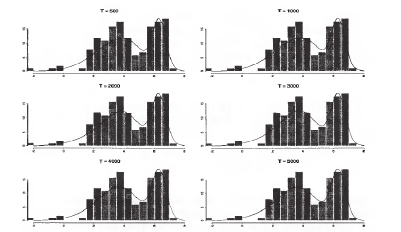

Fig.7 and Fig.8 illustrate the performance of this algorithm on a benchmark example introduced in Crawford et al. (1992). 

- Fig.7 shows the **lack of evolution** of the estimated density based on the averaged parameters from the Gibbs sampler when the number of iterations $ T $ increases.

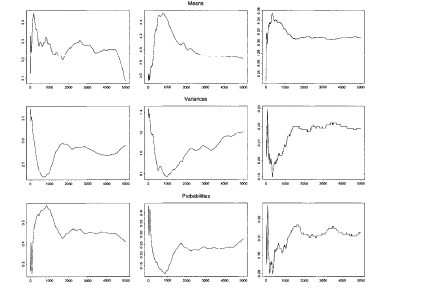
- Fig.8 provides the **corresponding convergence** of these averaged parameters and shows that stability is less obvious at this level.
- This **phenomenon** occurs quite often in **mixture settings** and is mainly due to the **weak identifiability** of these models, where **different parameter sets** can lead to **very similar densities**.

### **Reparameterization and Stability**
Reparameterization of **mixtures** and **correction of prior distributions** help in achieving:
- **Higher stability** of Gibbs sampler algorithms.
- **Reduction** of trapping states.

### **Identifiability Constraint**
The **identifiability constraint** used in (10.11) has advantages over alternative constraints:

$$
\sigma_1 \geq \sigma_2 \geq \dots \geq \sigma_k \quad \text{or} \quad \mu_1 \leq \mu_2 \leq \dots \leq \mu_k.
$$

- This constraint **automatically** provides **compact support** for the parameters.
- It also leads to **more uniform prior distributions**.
- However, it can sometimes **slow convergence** in Gibbs sampling.

### **Parameterization and Sample Homogeneity**
- New parameterization **helps distinguish heterogeneous components** in the sample.
- If the **true components** are homogeneous, this reparameterization **can lead to Gibbs sampler failures**.
- When the **order of the components does not match** constraint (10.11), the Gibbs sampler **simultaneously permutes all observations** → **low mixing of sequences**.

### **Normal Case Solution**
One way to solve this issue in the **normal case** is to **identify homogeneous components** without imposing order constraints:

$$
\sigma_j \sim \mathcal{U}(0,1) \quad \text{and} \quad p_j \sim \mathcal{U}(0,1).
$$

This ensures better **parameter mixing** while still maintaining identifiability.


For **fast text extraction from images**, check out **DeepSeek AI**:  
🔗 [Install the Chrome Extension](https://chromewebstore.google.com/detail/deepseek-ai/npphdmcakmfhllhblkealgkeefamebih)


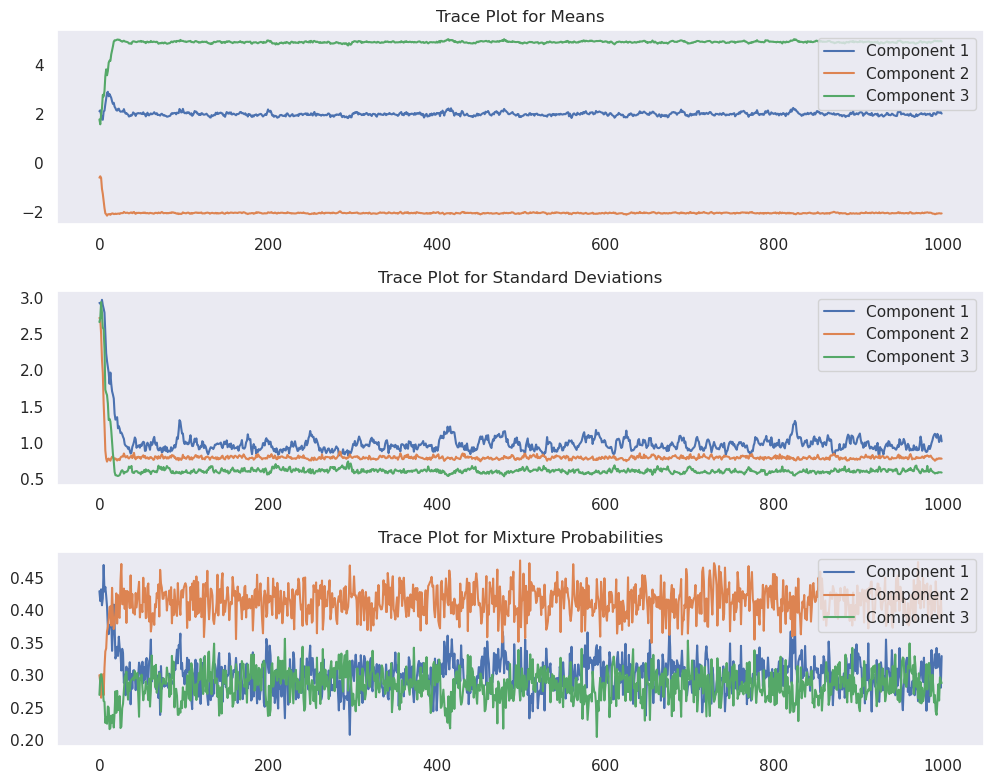

Estimated Means: [ 1.97268172 -2.06295732  4.92145436]
Estimated Standard Deviations: [0.96908407 0.79784931 0.61577718]
Estimated Mixing Probabilities: [0.2974452  0.41486693 0.28768787]


In [4]:
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

# Set random seed for reproducibility
np.random.seed(42)

# Number of mixture components
K = 3
# Number of data points
N = 500

# True parameters (mixture weights, means, and variances)
true_p = np.array([0.4, 0.35, 0.25])  # Probabilities must sum to 1
true_mu = np.array([-2, 2, 5])  # Means of components
true_sigma = np.array([0.8, 1.2, 0.5])  # Standard deviations

# Generate synthetic data from the mixture model
component_labels = np.random.choice(K, size=N, p=true_p)
data = np.array([np.random.normal(true_mu[i], true_sigma[i]) for i in component_labels])

# Initialize parameters randomly
mu = np.random.normal(0, 1, K)
sigma = np.random.uniform(0.5, 2, K)
p = np.ones(K) / K  # Start with equal probabilities

# Gibbs Sampling parameters
num_iterations = 1000
mu_samples = np.zeros((num_iterations, K))
sigma_samples = np.zeros((num_iterations, K))
p_samples = np.zeros((num_iterations, K))

# Gibbs Sampling Loop
for t in range(num_iterations):
    # Step 1: Assign each data point to a cluster based on probability
    responsibilities = np.array([
        p[j] * stats.norm(mu[j], sigma[j]).pdf(data) for j in range(K)
    ])
    responsibilities /= responsibilities.sum(axis=0)  # Normalize
    cluster_assignments = [np.random.choice(K, p=responsibilities[:, i]) for i in range(N)]
    
    # Step 2: Update parameters based on new assignments
    for j in range(K):
        assigned_points = data[np.array(cluster_assignments) == j]
        
        # Update mean using Normal posterior
        if len(assigned_points) > 0:
            mu[j] = np.mean(assigned_points)
        
        # Update variance using inverse Gamma prior
        sigma[j] = np.std(assigned_points) if len(assigned_points) > 1 else sigma[j]
    
    # Step 3: Update mixing probabilities using Dirichlet distribution
    cluster_counts = np.array([np.sum(np.array(cluster_assignments) == j) for j in range(K)])
    p = np.random.dirichlet(cluster_counts + 1)  # Dirichlet prior

    # Store samples
    mu_samples[t] = mu
    sigma_samples[t] = sigma
    p_samples[t] = p

# Plot the results
fig, axes = plt.subplots(3, 1, figsize=(10, 8))

for k in range(K):
    axes[0].plot(mu_samples[:, k], label=f'Component {k+1}')
    axes[1].plot(sigma_samples[:, k], label=f'Component {k+1}')
    axes[2].plot(p_samples[:, k], label=f'Component {k+1}')

axes[0].set_title("Trace Plot for Means")
axes[1].set_title("Trace Plot for Standard Deviations")
axes[2].set_title("Trace Plot for Mixture Probabilities")

for ax in axes:
    ax.legend()
    ax.grid()

plt.tight_layout()
plt.show()

# Final estimated parameters
print("Estimated Means:", np.mean(mu_samples[-100:], axis=0))
print("Estimated Standard Deviations:", np.mean(sigma_samples[-100:], axis=0))
print("Estimated Mixing Probabilities:", np.mean(p_samples[-100:], axis=0))


In [5]:
import random
import math
from collections import defaultdict

# Helper function for normal probability density function (PDF)
def normal_pdf(x, mu, sigma):
    return (1 / (math.sqrt(2 * math.pi) * sigma)) * math.exp(-((x - mu) ** 2) / (2 * sigma ** 2))

# Generate synthetic data from a 3-component Gaussian mixture
def generate_mixture_data():
    true_p = [0.4, 0.35, 0.25]  # Mixture probabilities
    true_mu = [-2, 2, 5]  # Means
    true_sigma = [0.8, 1.2, 0.5]  # Standard deviations
    data = []
    
    for _ in range(500):  # Number of points
        component = random.choices([0, 1, 2], weights=true_p)[0]
        x = random.gauss(true_mu[component], true_sigma[component])
        data.append(x)
    
    return data

# Gibbs Sampler for Gaussian Mixture Model
def gibbs_sampling(data, num_iterations=1000, K=3):
    # Initialize parameters randomly
    mu = [random.uniform(min(data), max(data)) for _ in range(K)]
    sigma = [random.uniform(0.5, 2) for _ in range(K)]
    p = [1.0 / K] * K  # Equal probabilities initially

    # Storage for trace
    mu_trace, sigma_trace, p_trace = [], [], []
    
    for _ in range(num_iterations):
        # Step 1: Assign points to clusters based on posterior probability
        cluster_assignments = []
        responsibilities = defaultdict(list)
        
        for x in data:
            probs = [p[j] * normal_pdf(x, mu[j], sigma[j]) for j in range(K)]
            total = sum(probs)
            probs = [p_ / total for p_ in probs]  # Normalize
            chosen_cluster = random.choices(range(K), weights=probs)[0]
            cluster_assignments.append(chosen_cluster)
            responsibilities[chosen_cluster].append(x)

        # Step 2: Update cluster parameters
        for j in range(K):
            assigned_points = responsibilities[j]
            if assigned_points:
                mu[j] = sum(assigned_points) / len(assigned_points)
                sigma[j] = math.sqrt(sum((x - mu[j]) ** 2 for x in assigned_points) / len(assigned_points))
        
        # Step 3: Update mixture probabilities
        cluster_counts = [cluster_assignments.count(j) for j in range(K)]
        total_counts = sum(cluster_counts)
        p = [count / total_counts for count in cluster_counts]

        # Store parameters for visualization
        mu_trace.append(mu[:])
        sigma_trace.append(sigma[:])
        p_trace.append(p[:])

    return mu_trace, sigma_trace, p_trace

# Run the Gibbs sampler
data = generate_mixture_data()
mu_samples, sigma_samples, p_samples = gibbs_sampling(data)

# Display final estimated parameters
print("Estimated Means:", mu_samples[-1])
print("Estimated Standard Deviations:", sigma_samples[-1])
print("Estimated Mixture Probabilities:", p_samples[-1])


Estimated Means: [-1.9906432158968148, 1.9067846188629516, 4.817696175251477]
Estimated Standard Deviations: [0.7641729710707601, 0.8296366824406426, 0.6087359453597928]
Estimated Mixture Probabilities: [0.452, 0.246, 0.302]
